# PRCP-1018-BikeRental

### Problem Statement

By predicting rental patterns, companies can adapt their pricing strategies according to anticipated demand. This involves forecasting the daily/hourly bike rental count using machine learning algorithms, taking into account environmental factors and seasonal conditions.

### 1.Importing Libraries

In [5]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import *

# Importing LogisticRegressor model from sklearn
from sklearn.linear_model import LinearRegression

# Importing DecisionTreeRegressor model from sklearn
from sklearn.tree import DecisionTreeRegressor

# Importing RandomForestRegressor model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing XGBRegressor model from sklearn
from xgboost import XGBRegressor

# Importing SVR model from sklearn
from sklearn.svm import SVR

#Importing Kneighborsregressor model from sklearn
from sklearn.neighbors import KNeighborsRegressor

#Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

### 2.Importing Data

In [7]:
day_data=pd.read_csv('day.csv',parse_dates=['dteday'])
day_data

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [8]:
hr_data=pd.read_csv('hour.csv',parse_dates=['dteday'])
hr_data

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
17374           2  0.26  0.2576  0.60     0.1642      11         108  119  
17375           2  0.26  0.2576  0.60     0.1642       8          81   89  
17376           1  0.26  0.2576  0.60     0.1642       7          83   90  
17377           1  0.26  0.2727  0.56     0.1343      13          48   61  
17378           1  0.26  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 17 columns]

### 3.Domain Analysis

1. instant: It holds a unique identifier for each record.
2. dteday: This column will have the date of the record, in a format like YYYY-MM-DD.
3. season: This column indicates the season of the year where-1: Winter,2: Spring,3: Summer,4: Fall.
4. yr: It holds the the year of the observation, where-0: 2011,1: 2012.
5. mnth: This column tells the month of the year (1–12).
6. hr: This tells the hour of the day (0–23).
7. holiday: Here we can know whether the day is a holiday or not.
8. weekday: The day of the week (likely from 0 to 6, corresponding to Monday to Sunday).
9. workingday: A binary flag indicating whether the day is a working day (1 for working days, 0 for weekends or holidays).
10. weathersit: Here we can know the weather condition, represented as-1: Clear, Few clouds, Partly cloudy,2: Mist, Cloudy, Broken clouds, Few clouds,3: Light Snow, Light Rain with Thunderstorm, Scattered clouds,4: Heavy Rain, Ice Pellets, Thunderstorm, Mist, Snow with Fog
11. temp: This column tells the normalized temperature in Celsius (normalized between -8 and 39).
12. atemp: It holds the normalized feeling temperature in Celsius (normalized between -16 and 50).
13. hum: This column tells the normalized humidity (values between 0 and 1, where the maximum is 100%).
14. windspeed: This will let us know the normalized wind speed (values between 0 and 1, divided by a maximum value of 67).
15. casual: It tells the count of casual users (non-registered bike renters).
16. registered: This column holds the count of registered users (subscribers).
17. cnt: In this column will get the information about the total number of bike rentals (both casual and registered users).

In [11]:
#getting the peak hour of the day
peak_hour = hr_data.loc[hr_data.groupby('dteday')['cnt'].idxmax().reset_index(drop=True), ['dteday', 'hr']]
peak_hour.rename(columns={'hr': 'peak_hour'},inplace=True)

In [12]:
#getting the count of rentals during the peak hour for each day
peak_hour_counts=hr_data.groupby('dteday')['cnt'].max().reset_index()
peak_hour_counts.rename(columns={'cnt':'peak_hour_rentals'},inplace=True)

In [13]:
#count of rentals in day_time
day_rentals = hr_data[(hr_data['hr'] >= 6) & (hr_data['hr'] <=12)].groupby('dteday')['cnt'].sum().reset_index()
day_rentals.rename(columns={'cnt': 'day_rentals'},inplace=True)

In [14]:
#count of rentals at night_time
night_rentals = hr_data[(hr_data['hr'] >=21) | (hr_data['hr'] <=4)].groupby('dteday')['cnt'].sum().reset_index()
night_rentals.rename(columns={'cnt': 'night_rentals'},inplace=True)

In [15]:
data = day_data.copy()

# Merging all features on 'dteday'
data = data.merge(peak_hour, on='dteday', how='left')
data = data.merge(peak_hour_counts, on='dteday', how='left')
data = data.merge(day_rentals, on='dteday', how='left')
data = data.merge(night_rentals, on='dteday',how='left')

In [16]:
data

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  peak_hour  peak_hour_rentals  day_rentals  night_rentals  
0     985         15                110        203.0            203  
1     801         12                 93        247.0            100  
2    1349         17                157        492.0             92  
3    1562         17                212        586.0            104  
4    1600          8                195        613.0            120  
..    ...        ...                ...          ...            ...  
726  2114         17                257        763.0            147  
727  3095         17                271       1155.0            258  
728  1341         16                147        252.0            237  
729  1796         13                169        530.0            242  
730  2729         15                315        979.0            268  

[731 rows x 20 columns]

In [17]:
data['morning_rental_ratio'] = data['day_rentals'] / data['cnt']
data['night_rental_ratio'] = data['night_rentals'] / data['cnt']

In [18]:
data.drop(columns=['day_rentals','night_rentals'],inplace=True)

In [19]:
col_to_move = 'cnt'  
data[col_to_move] = data.pop(col_to_move) 

Insight: The hour and day data shared the same features, except for the hour predictor. As a result, we created a new columns based on the hour and merged it with the day data.

### 4.Basic Checks

In [22]:
#checking the first five rows of the data
data.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

   peak_hour  peak_hour_rentals  morning_rental_ratio  night_rental_ratio  \
0         15                110              0.206091            0.206091   
1         12                 93              0.308365            0.124844   
2         17                157              0.364715            0.068199   
3         17                212              0.375160            0.066581   
4          8                195              0.383125            0.075000   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [23]:
#checking the last five rows of the data
data.tail()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

     peak_hour  peak_hour_rentals  morning_rental_ratio  night_rental_ratio  \
726         17                257              0.360927            0.069536   
727         17                271              0.373183            0.083360   
728         16                147              0.187919            0.176734   
729         13                169              0.295100            0.134744   
730         15                315              0.358739            0.098204   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [24]:
#checking the number of rows and column in the data
data.shape

(731, 20)

Insight: We have 731 observations, 19 predictors and 1 target variable.

In [26]:
#checking the predictors of the data
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'peak_hour', 'peak_hour_rentals',
       'morning_rental_ratio', 'night_rental_ratio', 'cnt'],
      dtype='object')

In [27]:
#checking the unique values
for i in data:
    print(i)
    print(data[i].unique())
    print(f'Number of unique values:{data[i].nunique()}')
    print('  ')

instant
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

In [28]:
#checking the count of unique values
for i in data:
    print(data[i].value_counts())

instant
1      1
481    1
483    1
484    1
485    1
      ..
246    1
247    1
248    1
249    1
731    1
Name: count, Length: 731, dtype: int64
dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: count, Length: 731, dtype: int64
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
yr
1    366
0    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64
holiday
0    710
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64
workingday
1    500
0    231
Name: count, dtype: int64
weathersit
1    463
2    247
3     21
Name: count, dtype: int64
temp
0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.6433

In [29]:
#checking a concise summary of a data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   instant               731 non-null    int64         
 1   dteday                731 non-null    datetime64[ns]
 2   season                731 non-null    int64         
 3   yr                    731 non-null    int64         
 4   mnth                  731 non-null    int64         
 5   holiday               731 non-null    int64         
 6   weekday               731 non-null    int64         
 7   workingday            731 non-null    int64         
 8   weathersit            731 non-null    int64         
 9   temp                  731 non-null    float64       
 10  atemp                 731 non-null    float64       
 11  hum                   731 non-null    float64       
 12  windspeed             731 non-null    float64       
 13  casual              

In [30]:
#To check the descriptive statistics of a data
data.describe()

instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000    0.059130    0.079070   
25%      0.000000    1.000000    0.000000    1.000000    0.337083    0.337842   
50%      0.000000    3.000000    1.000000    1.000000    0.498333    0.486733   
75%      0.000000    5.000000    1.000000    2.000000    0.655417    0.608602   
max      1.000000    6.000000    1.000000    3.000000    0.861667    0.840896   
std      0.167155    2.004787    0.465233    0.544894    0.183051    0.162961   

              hum   windspeed       casual   registered   peak_hour  \
count  731.000000  731.000000   731.000000   731.000000  731.000000   
mean     0.627894    0.190486   848.176471  3656.172367   14.276334   
min      0.000000    0.022392     2.000000    20.000000    0.000000   
25%      0.520000    0.134950   315.500000  2497.000000   12.000000   
50%      0.626667    0.180975   713.000000  3662.000000   16.000000   
75%      0.730209    0.233214  1096.000000  4776.500000   17.000000   
max      0.972500    0.507463  3410.000000  6946.000000   22.000000   
std      0.142429    0.077498   686.622488  1560.256377    3.714131   

       peak_hour_rentals  morning_rental_ratio  night_rental_ratio  \
count         731.000000            728.000000          731.000000   
mean          510.291382              0.335292            0.116372   
min            22.000000              0.004392            0.033915   
25%           356.000000              0.300412            0.094791   
50%           509.000000              0.334210            0.112002   
75%           659.000000              0.364602            0.128661   
max           977.000000              0.648841            1.000000   
std           214.625960              0.058347            0.045722   

               cnt  
count   731.000000  
mean   4504.348837  
min      22.000000  
25%    3152.000000  
50%    4548.000000  
75%    5956.000000  
max    8714.000000  
std    1937.211452

### 5.Exploratory Data Analysis(EDA)

In [ ]:
report=ProfileReport(data,title='Bike Rental Prediction',explorative=False)
report

Insight:The data has 10 Numerical,1 Datetime and 5 Categorical columns.

#### 5.1 Univariate Analysis

#### 5.1.1 For Categorical Column

In [36]:
#examining a single variable

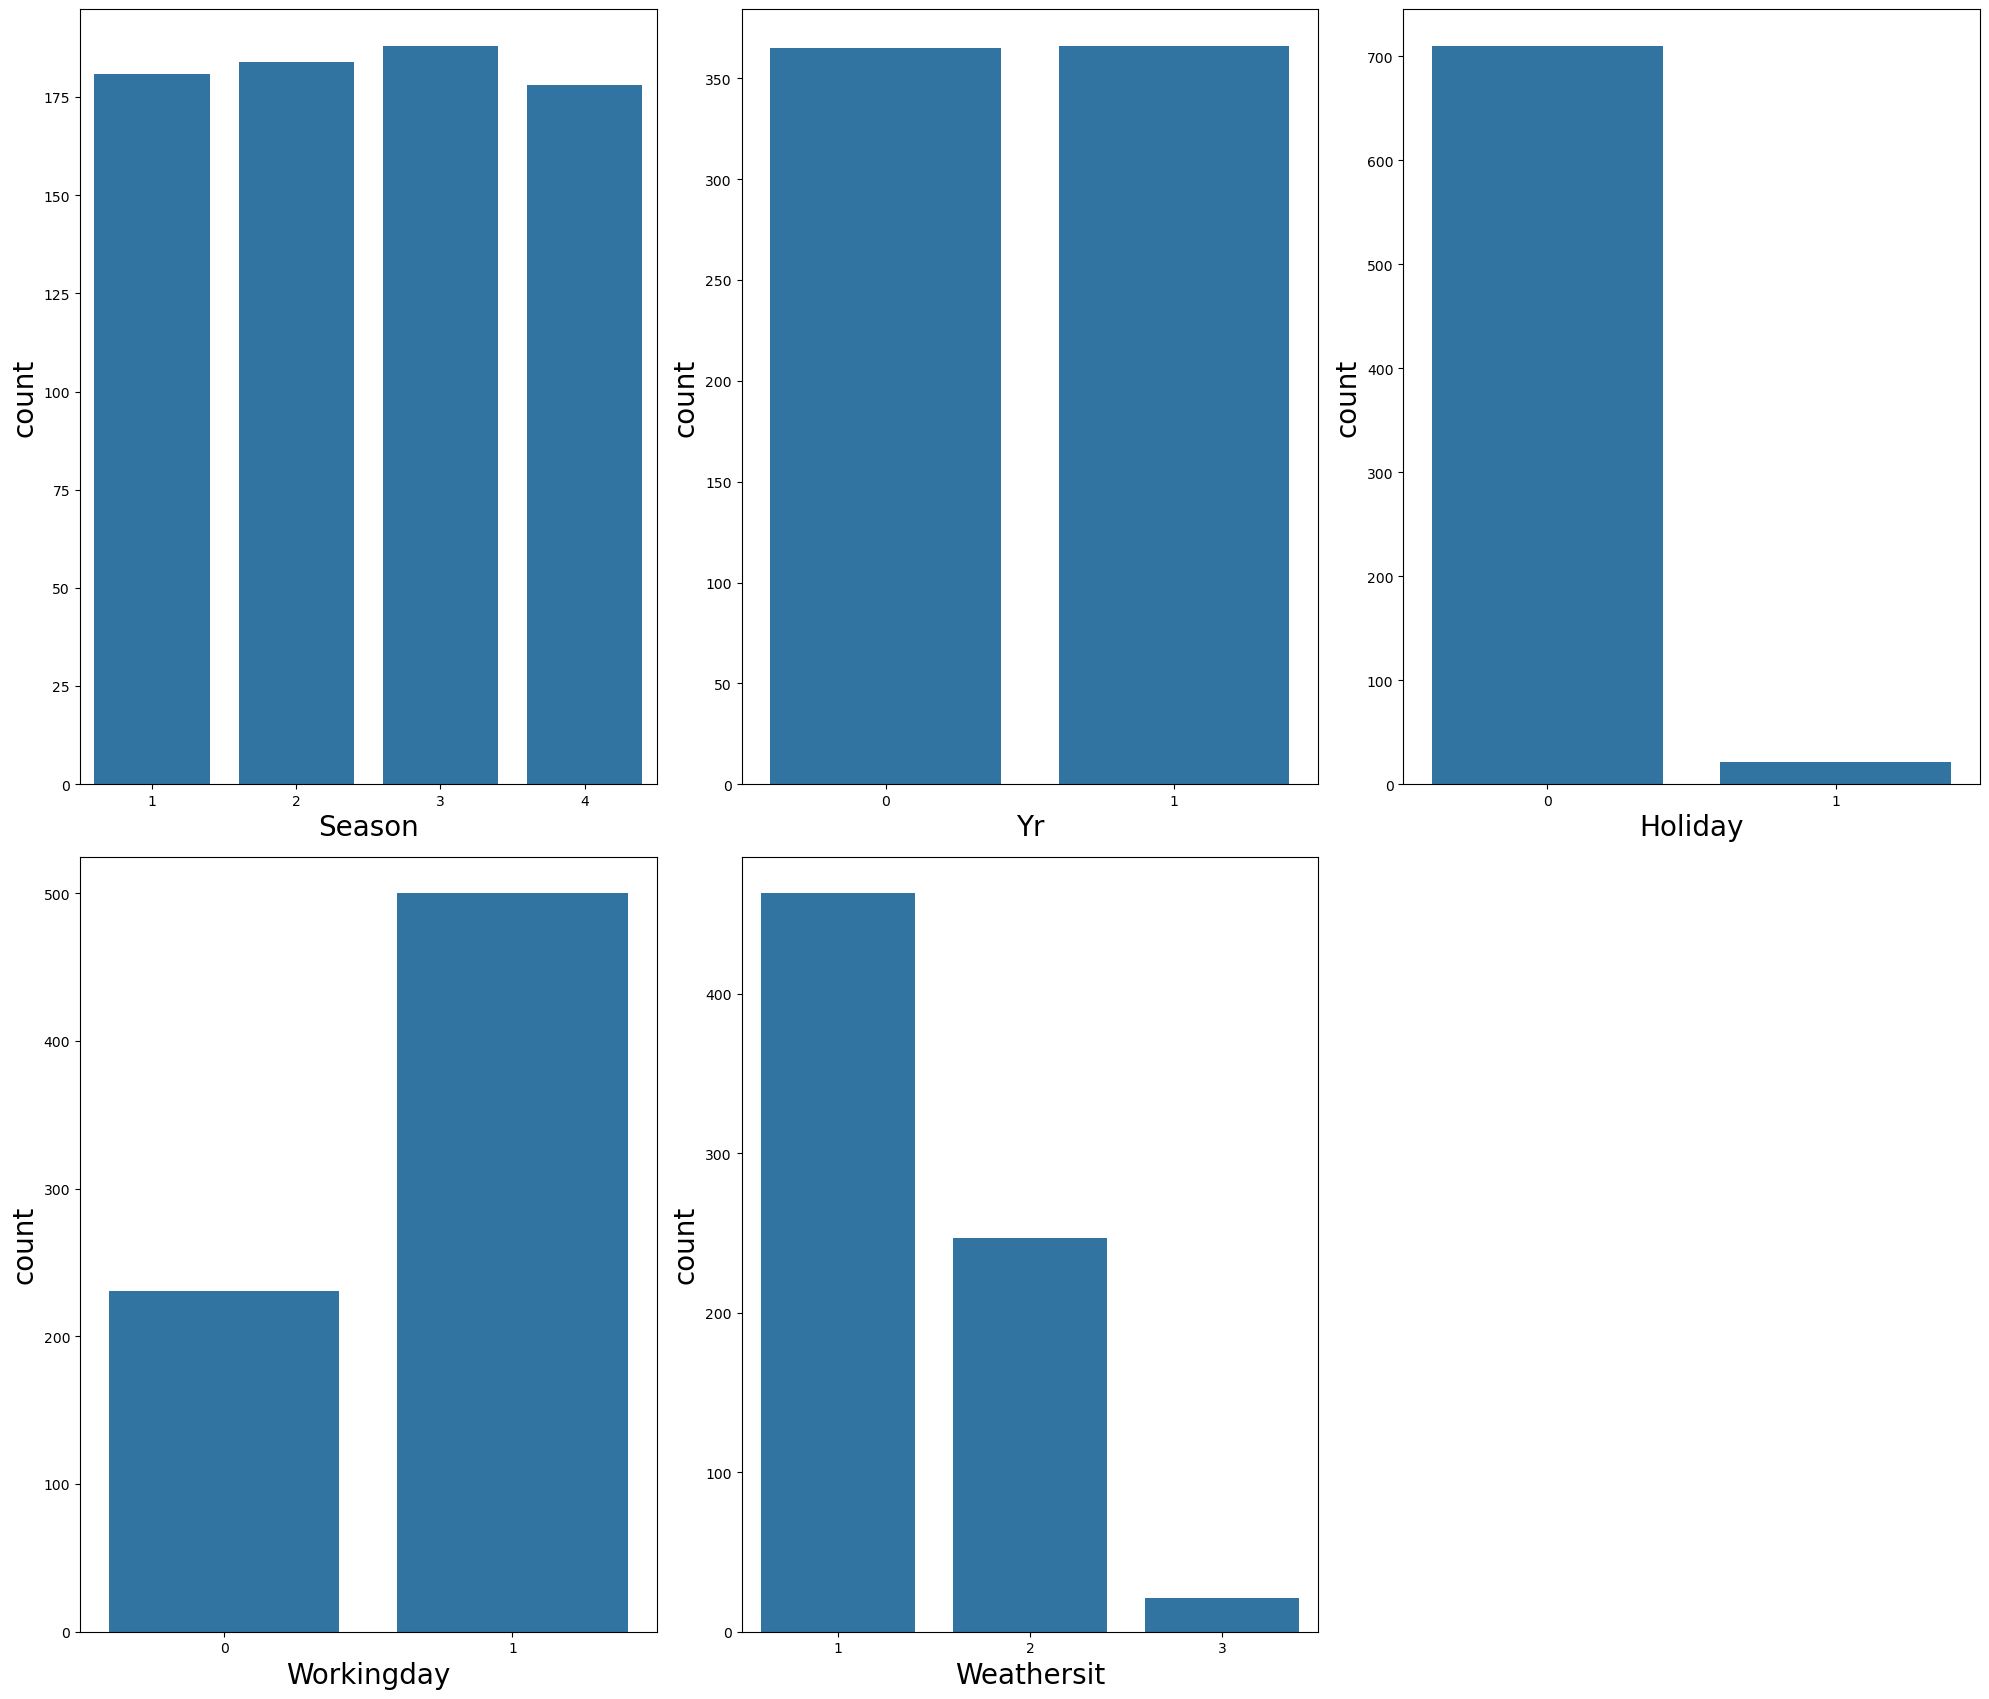

In [37]:
categorical_col=['season','yr','holiday','workingday','weathersit']
plt.figure(figsize=(20,25))
plotnumber=1
for i in categorical_col:
    if plotnumber<=5:
        sp=plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        
        plt.xlabel(i.title(),fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()      

#### 5.1.2 For Numerical Columns

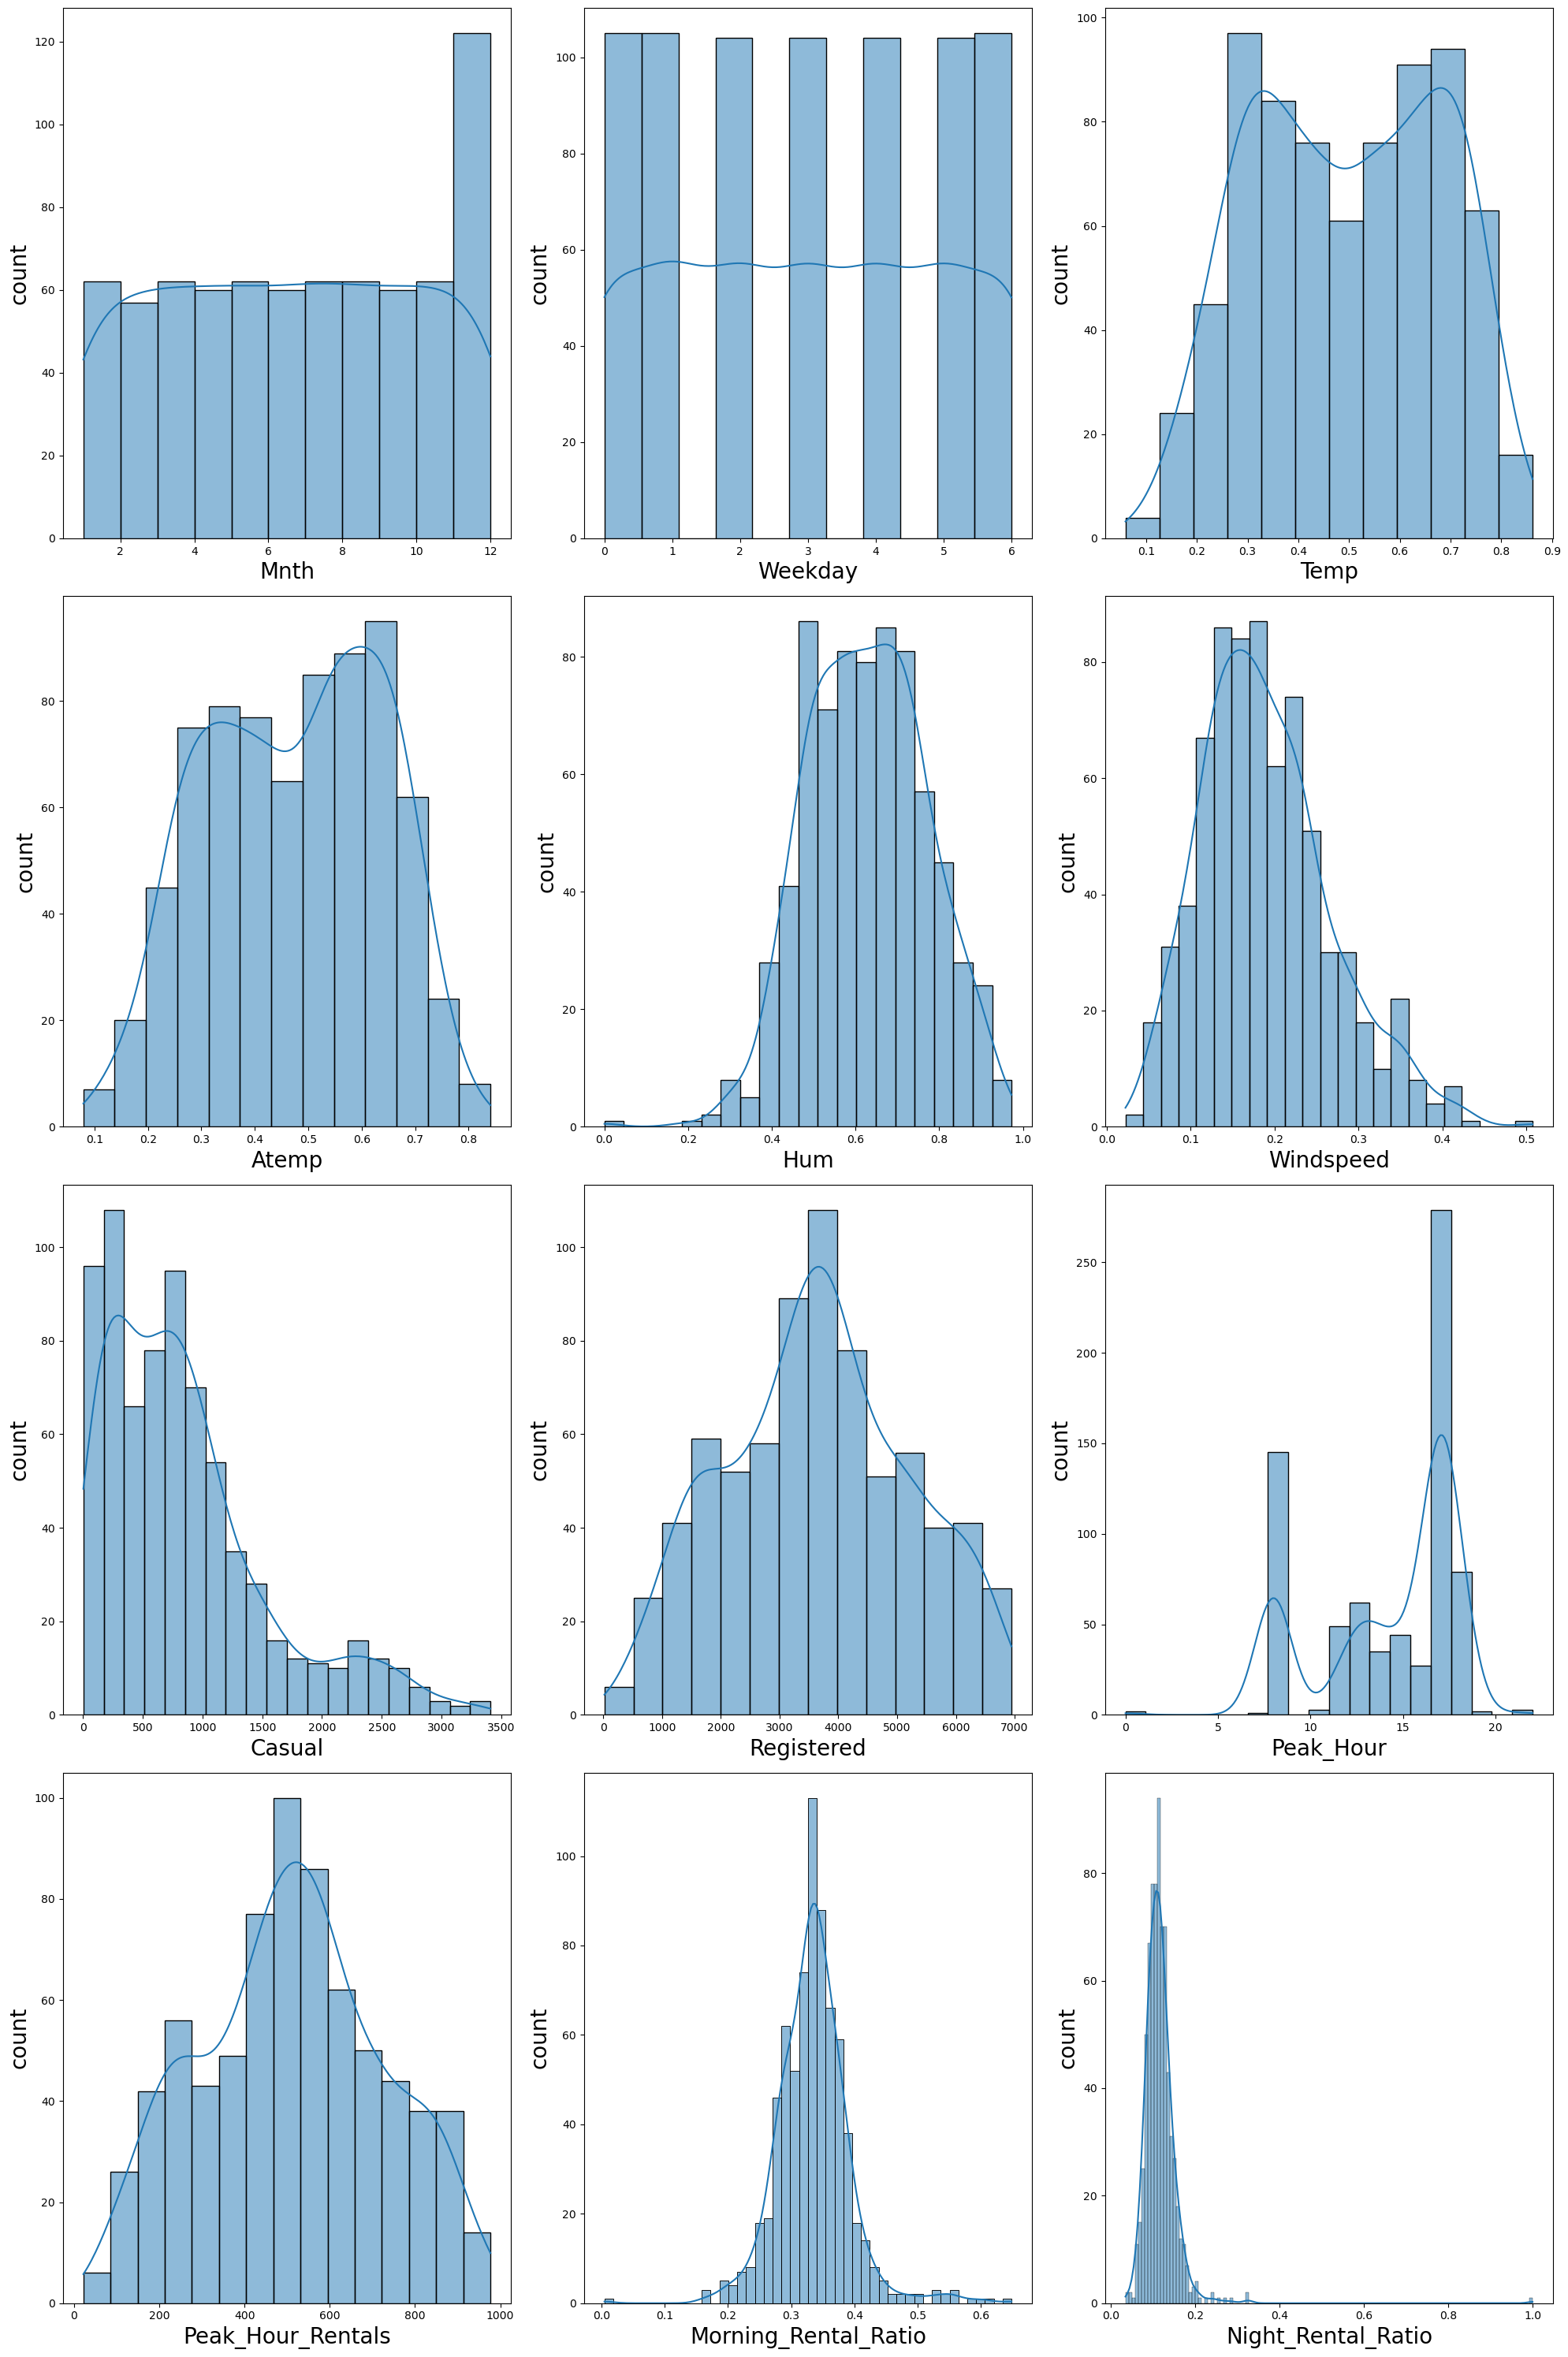

In [39]:
numerical_col=['mnth','weekday','temp', 'atemp', 'hum', 'windspeed','casual', 'registered','peak_hour', 'peak_hour_rentals',
       'morning_rental_ratio', 'night_rental_ratio']
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in numerical_col:
    if plotnumber<=12:
        sp=plt.subplot(4,3,plotnumber)
        sns.histplot(data[i],kde=True)

        plt.xlabel(i.title(),fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 5.2 Bivariate Analysis

In [41]:
#examining the relationship between the numerical and categorical variable

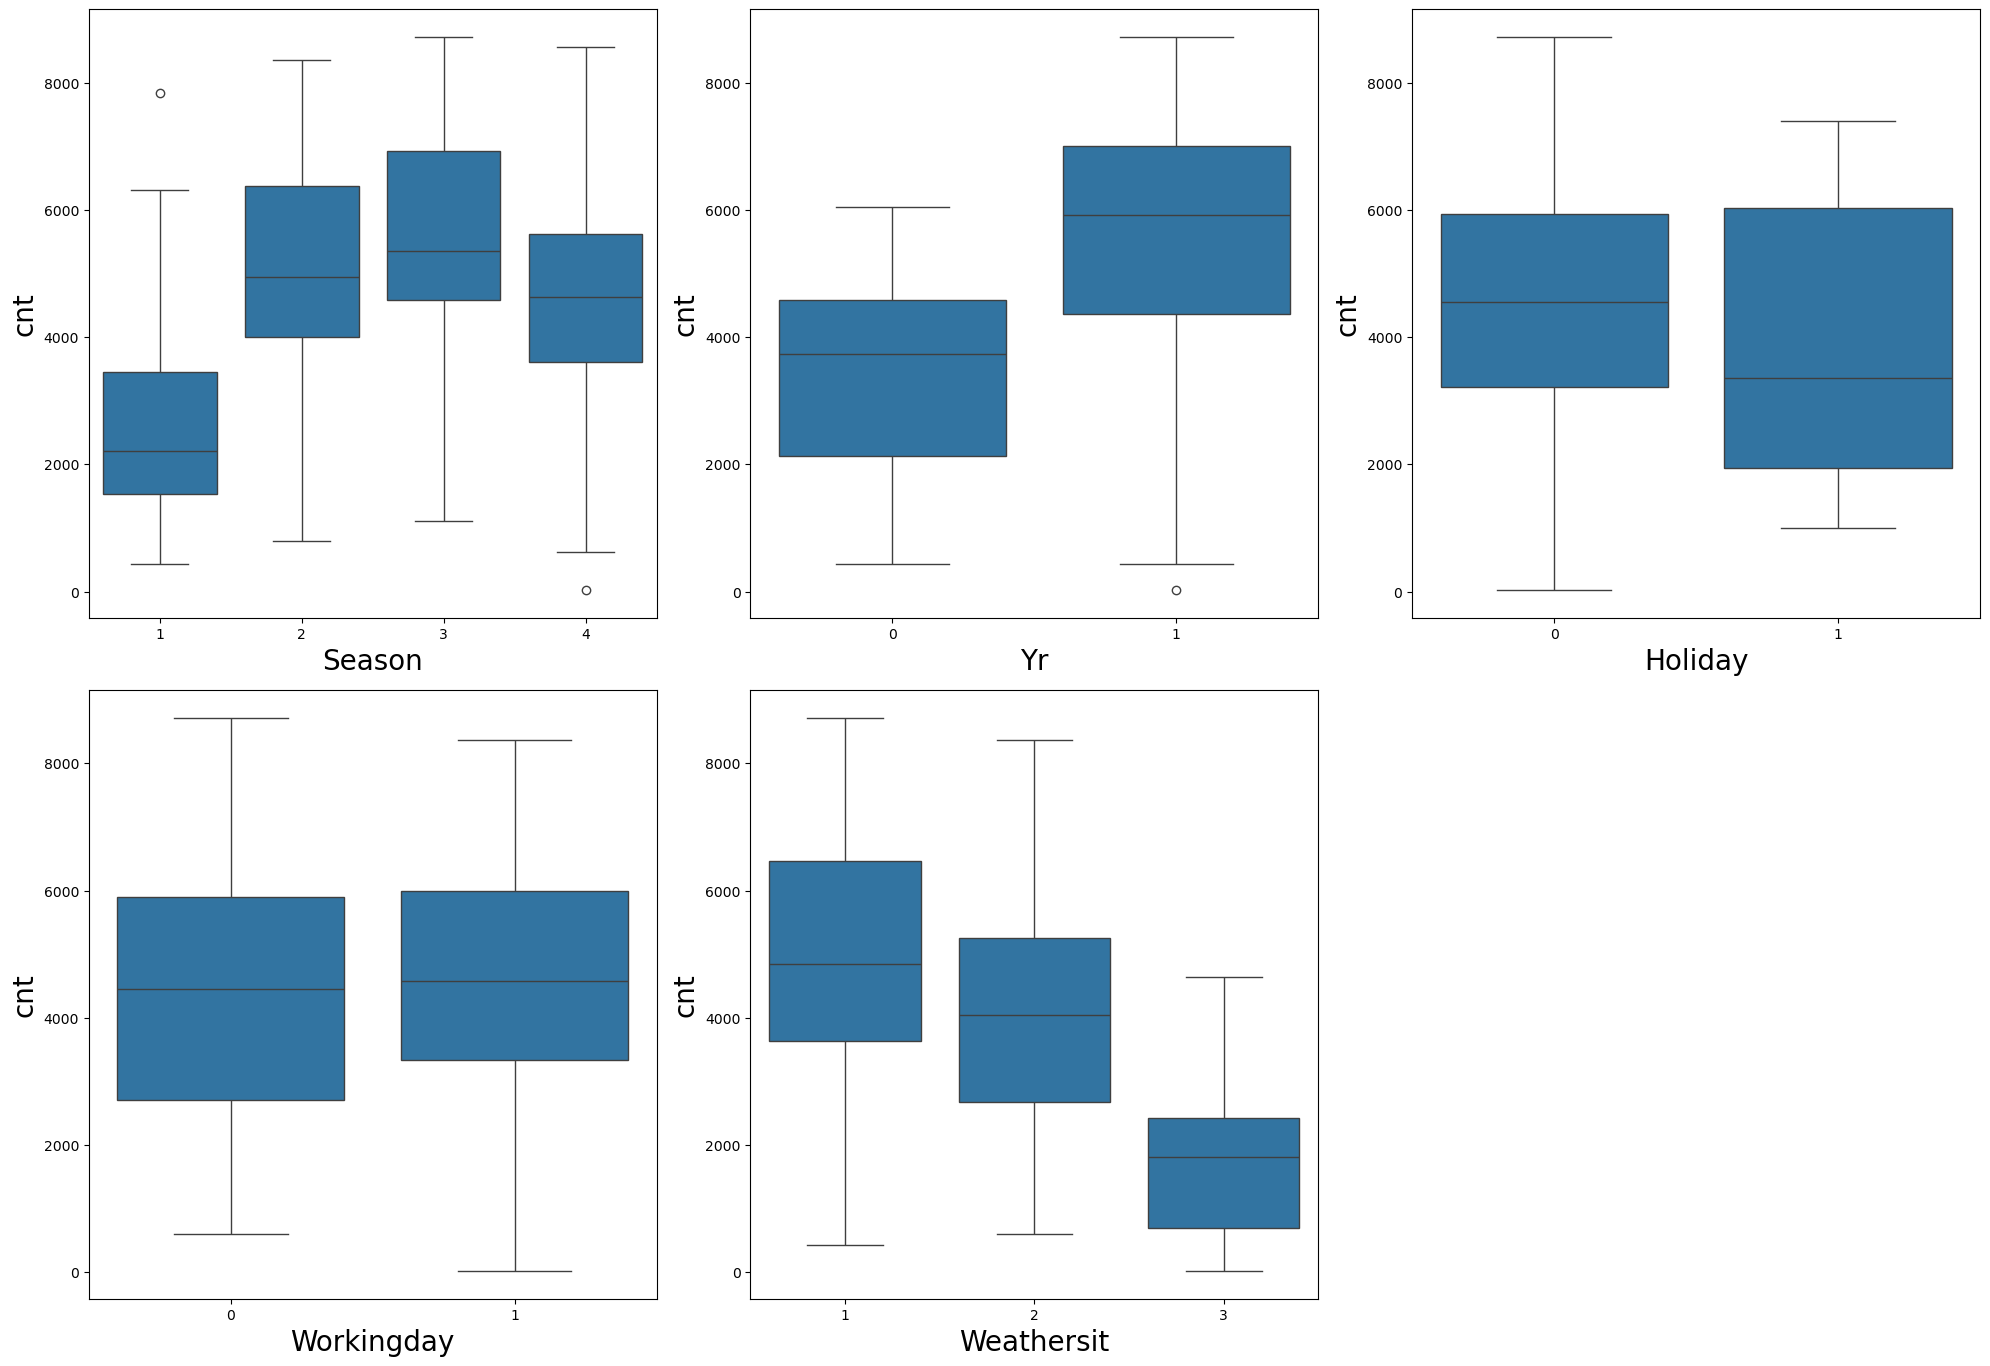

In [42]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in categorical_col:
    if plotnumber<=5:
        sp=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=i,y='cnt',data=data)

        plt.xlabel(i.title(),fontsize=20)
        plt.ylabel('cnt',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [43]:
#examining the relationship between two numerical variables

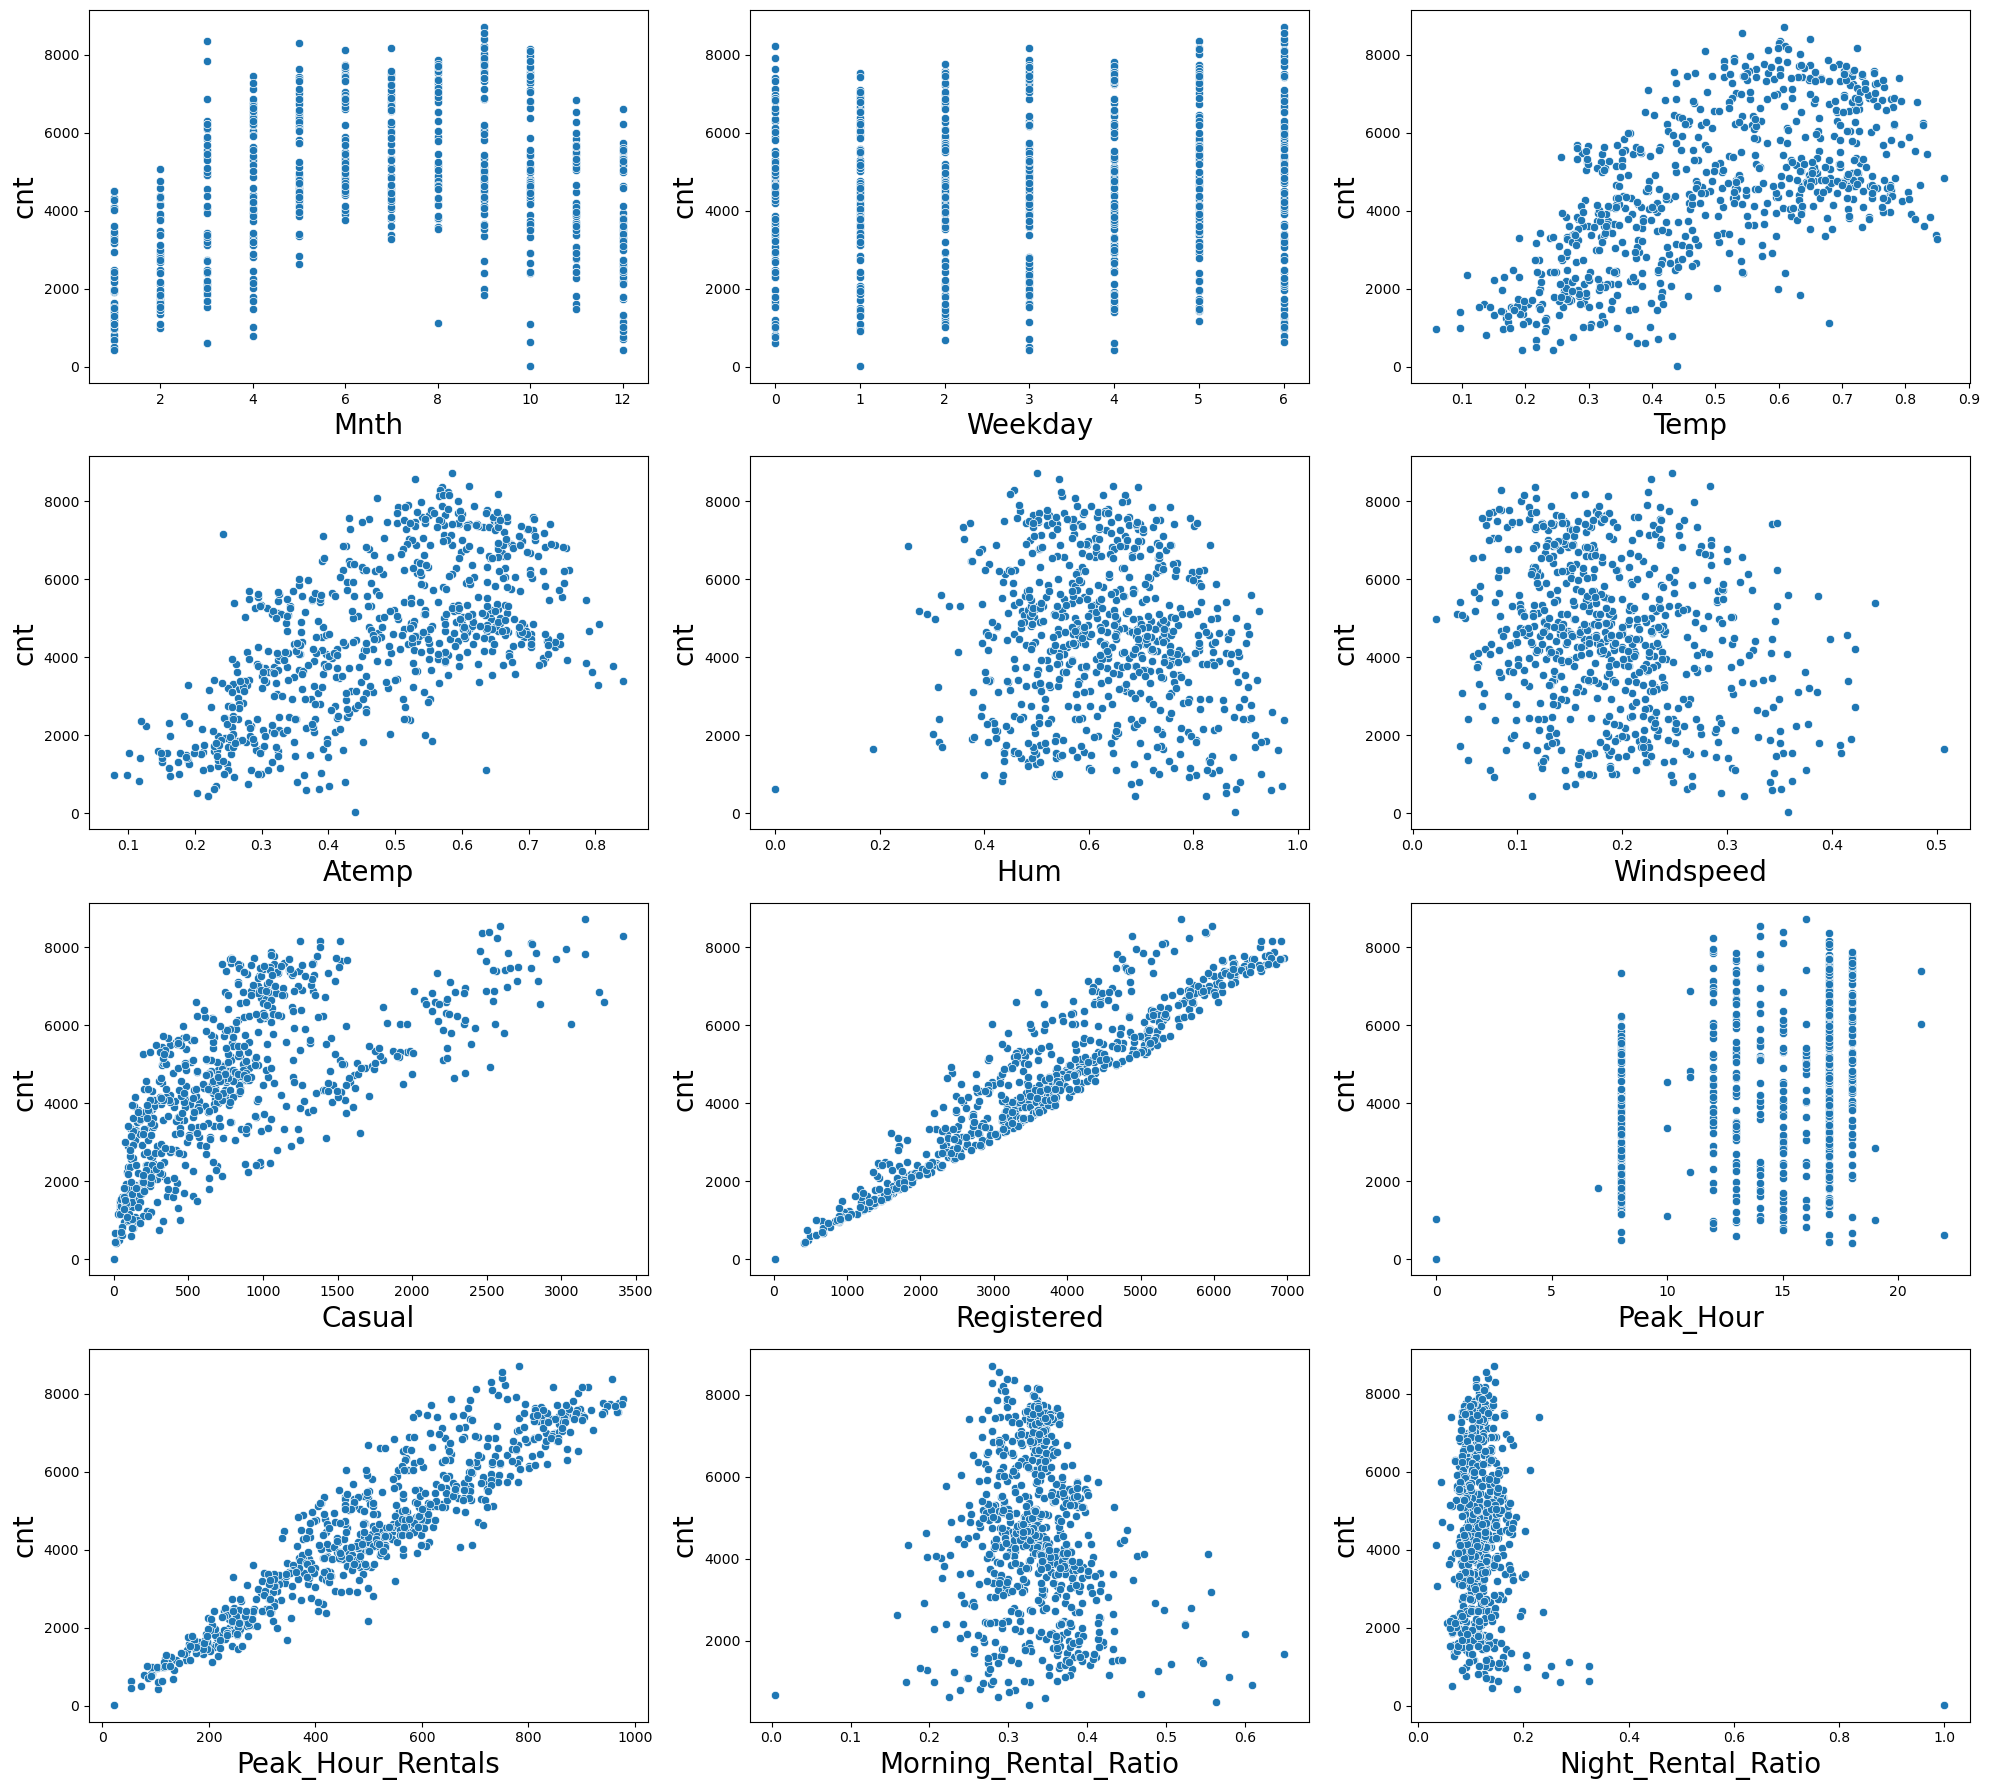

In [44]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for i in numerical_col:
    if plotnumber<=12:
        sp=plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=i,y='cnt',data=data)

        plt.xlabel(i.title(),fontsize=20)
        plt.ylabel('cnt',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 5.3 Multivariate Analysis

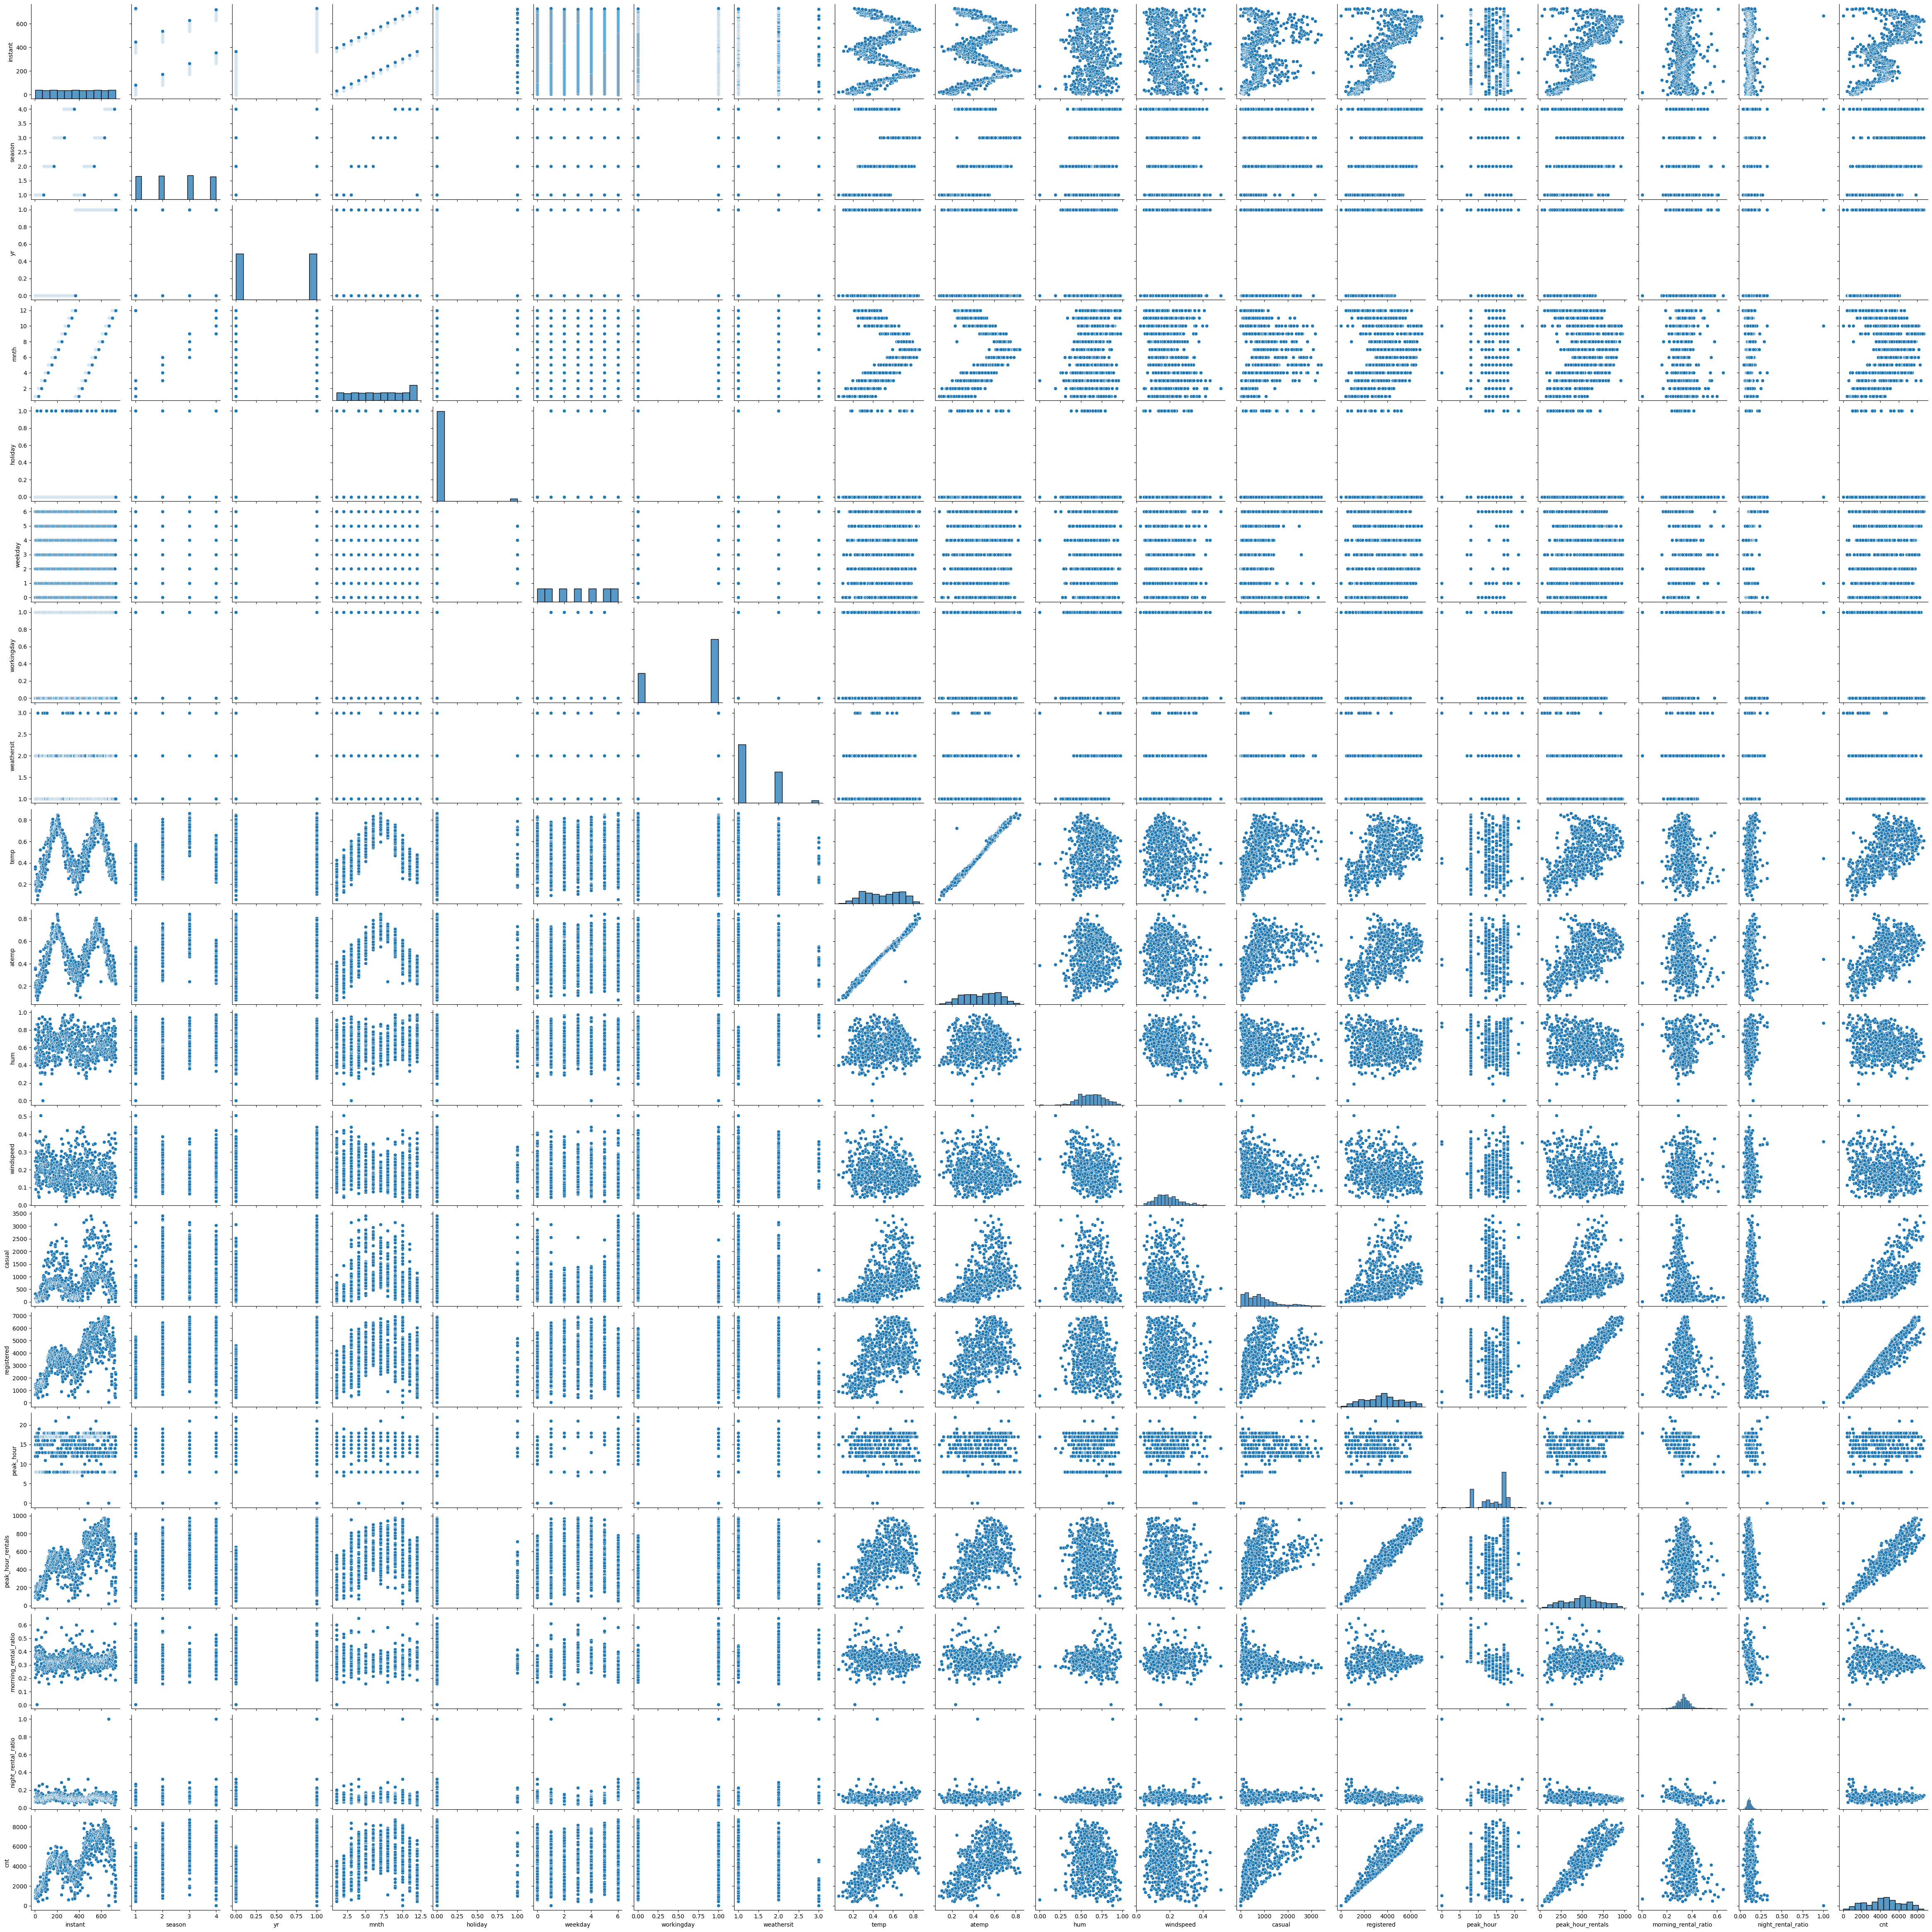

In [46]:
#to understand relationships, patterns, and dependencies between variables
sns.pairplot(data)
plt.show()

#### 5.4 Correlation

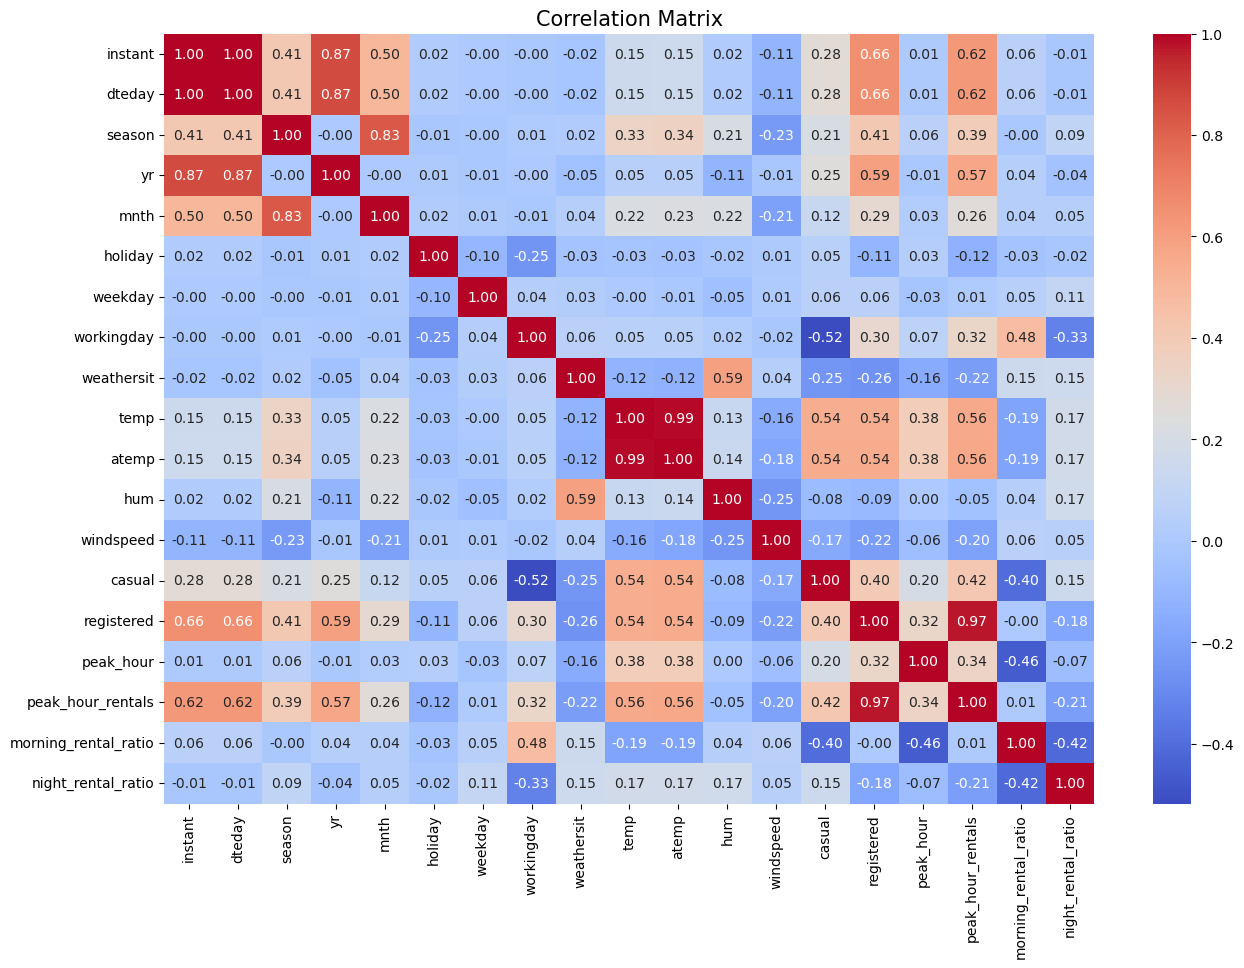

In [48]:
#visualizing the correlation between variables
correlation_matrix=data.drop(columns=['cnt']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix',fontsize=15)
plt.show()

Insights:
1. Bike rentals are significantly higher during the summer season.
2. The number of bike rentals is relatively low during weather conditions such as Light Snow, Light Rain with Thunderstorms, and Scattered Clouds.
3. The count of bike rentals is particularly low in the spring season and holidays(i.e.weekend).4. The highest number of rentals occurs during favorable weather conditions, while the lowest rentals are observed during poor weather conditions.
5. The season variable has a strong correlation with the month variable.
6. Temperature (temp) and feels-like temperature (atemp) are positively correlated with cnt (bike rentals).
7. The highest number of rentals occurs between 15.00 PM and 20.00 PM.

### 6.Data Preprocessing

#### 6.1 Dropping an unrequired Columns

In [52]:
columns_to_drop=['instant','dteday','season','atemp','casual','registered']
for i in columns_to_drop:
    if i in data.columns:
        data.drop(columns=[i],inplace=True)
data

yr  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
0     0     1        0        6           0           2  0.344167  0.805833   
1     0     1        0        0           0           2  0.363478  0.696087   
2     0     1        0        1           1           1  0.196364  0.437273   
3     0     1        0        2           1           1  0.200000  0.590435   
4     0     1        0        3           1           1  0.226957  0.436957   
..   ..   ...      ...      ...         ...         ...       ...       ...   
726   1    12        0        4           1           2  0.254167  0.652917   
727   1    12        0        5           1           2  0.253333  0.590000   
728   1    12        0        6           0           2  0.253333  0.752917   
729   1    12        0        0           0           1  0.255833  0.483333   
730   1    12        0        1           1           2  0.215833  0.577500   

     windspeed  peak_hour  peak_hour_rentals  morning_rental_ratio  \
0     0.160446         15                110              0.206091   
1     0.248539         12                 93              0.308365   
2     0.248309         17                157              0.364715   
3     0.160296         17                212              0.375160   
4     0.186900          8                195              0.383125   
..         ...        ...                ...                   ...   
726   0.350133         17                257              0.360927   
727   0.155471         17                271              0.373183   
728   0.124383         16                147              0.187919   
729   0.350754         13                169              0.295100   
730   0.154846         15                315              0.358739   

     night_rental_ratio   cnt  
0              0.206091   985  
1              0.124844   801  
2              0.068199  1349  
3              0.066581  1562  
4              0.075000  1600  
..                  ...   ...  
726            0.069536  2114  
727            0.083360  3095  
728            0.176734  1341  
729            0.134744  1796  
730            0.098204  2729  

[731 rows x 14 columns]

Insights:
1. Dropped the 'instant' and 'dteday' features because they contain unique values, making them irrelevant for analysis.
2. Dropped 'season'and 'atemp' due to high correlation with 'mnth' and 'temp',reducing redundancy and avoiding multicollinearity.
3. The 'casual' and 'registered' features were removed since their cumulative sum forms 'cnt', the target variable. Keeping them could lead to data leakage in predictive modeling. 

#### 6.2 Handlling Null Values

In [55]:
#checking the null values
print(data.isnull().sum())

yr                      0
mnth                    0
holiday                 0
weekday                 0
workingday              0
weathersit              0
temp                    0
hum                     0
windspeed               0
peak_hour               0
peak_hour_rentals       0
morning_rental_ratio    3
night_rental_ratio      0
cnt                     0
dtype: int64


In [56]:
#getting the row containing null value
data[data['morning_rental_ratio'].isna()]

yr  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
26    0     1        0        4           1           1  0.195000  0.687500   
667   1    10        0        1           1           3  0.440000  0.880000   
668   1    10        0        2           1           2  0.318182  0.825455   

     windspeed  peak_hour  peak_hour_rentals  morning_rental_ratio  \
26    0.113837         18                104                   NaN   
667   0.358200          0                 22                   NaN   
668   0.213009         18                143                   NaN   

     night_rental_ratio   cnt  
26             0.187935   431  
667            1.000000    22  
668            0.154197  1096

In [57]:
data['morning_rental_ratio']=data['morning_rental_ratio'].fillna(0)

In [58]:
data.isnull().sum().sum()

0

Insight:The final dataset contained null values, which we successfully handled using the fillna() method to ensure data consistency.

#### 6.3 Handling Duplicates

In [61]:
#checking for duplicates
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool


Insight:Thre are no duplicates.

#### 6.4 Outliers Handling

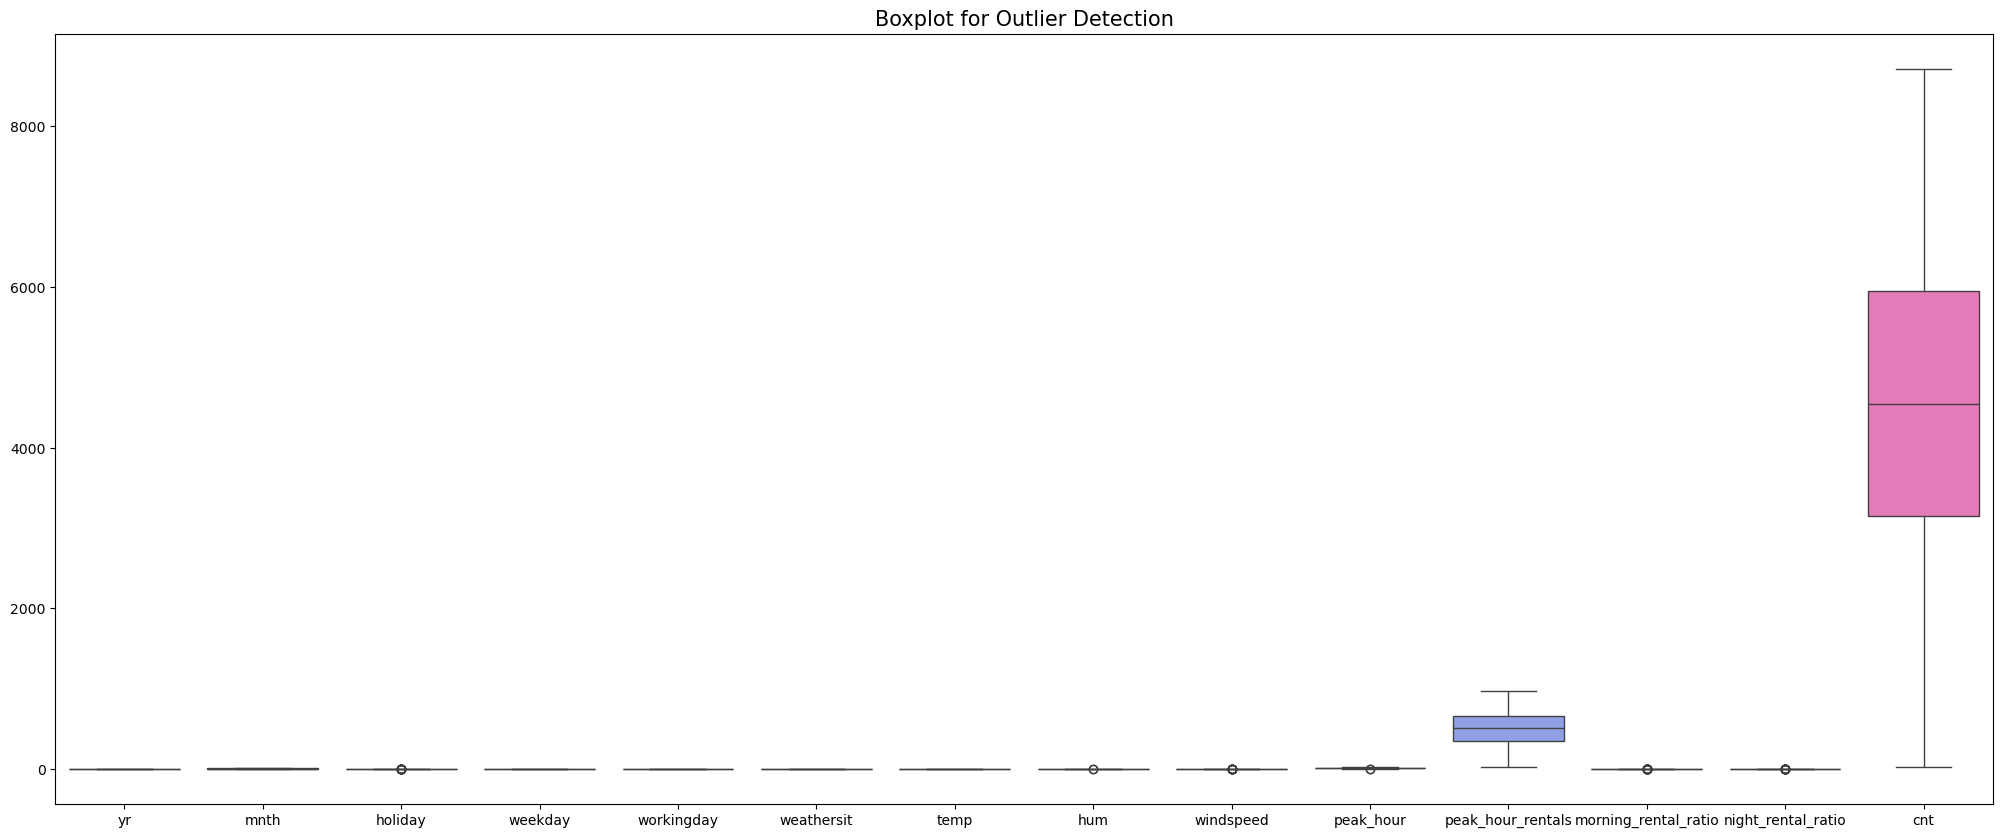

In [64]:
#checkking the outliers
plt.figure(figsize=(25,10))
sns.boxplot(data)
plt.title("Boxplot for Outlier Detection",fontsize=15)
plt.show()

Insight:There are no significant outliers in this dataset, as observed from the boxplot analysis.

### 7.Data Splitting

In [67]:
#extracting independent features from the data
x=data.iloc[:,:-1]

#extracting dependent feature
y=data['cnt']

In [68]:
#splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)

### 8.Model Training

### 8.1 Linear Regression

In [71]:
# Initializing LinearRegression model
linear_model=LinearRegression()

# Fitting the training data to the Linear Regression model
linear_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_linear=linear_model.predict(x_test)

In [72]:
# Evaluating the LinearRegression model's performance by R2_score 
Linear_R2=r2_score(y_test,y_pred_linear)
print(f'r2_score(linear)        : {Linear_R2}')
print(f'mean_squared_error      : {mean_squared_error(y_test,y_pred_linear)}')
print(f'mean_absolute_error     : {mean_absolute_error(y_test,y_pred_linear)}')
print(f'root_mean_square_error  : {np.sqrt(mean_squared_error(y_test,y_pred_linear))}')

r2_score(linear)        : 0.9496645711039199
mean_squared_error      : 200282.96404167652
mean_absolute_error     : 358.0600891684334
root_mean_square_error  : 447.5298470958965


### 8.2 Decision Tree

In [74]:
#initializing the model
DT=DecisionTreeRegressor()

#fitting the training data to the model
DT.fit(x_train,y_train)

#predicting the target for testing data
y_pred_DT=DT.predict(x_test)

In [75]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score 
DT_R2=r2_score(y_test,y_pred_DT)
print(f'r2_score(Dt) : {DT_R2}')

r2_score(Dt) : 0.9457882010240306


#### 8.2.1 Hyperparameter Tuning

In [77]:
# Initializing DecisionTreeRegressor model
DT_hp=DecisionTreeRegressor()

In [78]:
# Creating a dictionary with possible Hyperparameters
params={'splitter':["best", "random"],
        'criterion':["squared_error", "absolute_error"],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,20)),
        'min_samples_leaf':list(range(1,20)),
        }

In [79]:
# Initializing RandomizedSearchCV
tree_cv=RandomizedSearchCV(estimator=DT_hp,
                    param_distributions=params,
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    verbose=3)

In [80]:
# Fitting the training data to the RandomizedSearchCV
tree_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19],
                                        'splitter': ['best', 'random']},
                   scoring='r2', verbose=3)

In [81]:
# Getting best hyperparameters
tree_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_depth': 16,
 'criterion': 'squared_error'}

In [121]:
# Initializing DecisionTreeRegressor model
decision_tree_model=DecisionTreeRegressor(criterion='squared_error',max_depth=16,min_samples_leaf=13,min_samples_split=12,splitter='best')

# Fitting the training data to the DecisionTreeRegressor model
decision_tree_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_hp=decision_tree_model.predict(x_test)

In [123]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score 
Dt_hp_R2=r2_score(y_test,y_pred_hp)
print(f'r2_score(Dt)            : {Dt_hp_R2}')
print(f'mean_squared_error      : {mean_squared_error(y_test,y_pred_hp)}')
print(f'mean_absolute_error     : {mean_absolute_error(y_test,y_pred_DT)}')
print(f'root_mean_square_error  : {np.sqrt(mean_squared_error(y_test,y_pred_DT))}')

r2_score(Dt)            : 0.9419441625111445
mean_squared_error      : 231002.20793182423
mean_absolute_error     : 336.41818181818184
root_mean_square_error  : 464.44257889529155


### 8.3 Random Forest

In [85]:
# Initializing RandomForestRegressor model
RF_model=RandomForestRegressor()

# Fitting the training data to the RandomForestRegressor model
RF_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_RF=RF_model.predict(x_test)

In [86]:
# Evaluating the RandomForestRegressor model's performance by R2_score
RF_R2=r2_score(y_test,y_pred_RF)
print(f'r2_score(Rf) : {RF_R2}')

r2_score(Rf) : 0.9711226408954327


#### 8.3.1 Hyperparameter Tuning

In [177]:
# Initializing RandomForestRegressor model
RF_ht=RandomForestRegressor()

In [179]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
        }

In [181]:
# Initializing RandomizedSearchCV
RF_cv=RandomizedSearchCV(estimator=RF_ht,
                    param_distributions=params,
                    scoring='r2',
                    n_jobs=-1,
                    cv=3,
                    verbose=3)

In [183]:
# Fitting the training data to the RandomizedSearchCV
RF_cv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 200]},
                   scoring='r2', verbose=3)

In [185]:
# Getting the best hyperparameters
RF_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 7}

In [187]:
# Initializing RandomForestRegressor model
random_forest_model=RandomForestRegressor(n_estimators=200,max_depth=7,min_samples_leaf=1,min_samples_split=5)

# Fitting the training data to the RandomForestRegressor model
random_forest_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_ht=random_forest_model.predict(x_test)

In [189]:
# Evaluating the RandomForestRegressor model's performance by R2_score
RF_hp_R2=r2_score(y_test,y_pred_ht)
print(f'r2_score(Rf)            : {RF_hp_R2}')
print(f'mean_squared_error      : {mean_squared_error(y_test,y_pred_ht)}')
print(f'mean_absolute_error     : {mean_absolute_error(y_test,y_pred_ht)}')
print(f'root_mean_square_error  : {np.sqrt(mean_squared_error(y_test,y_pred_ht))}')

r2_score(Rf)            : 0.9673517447640053
mean_squared_error      : 129906.30005267337
mean_absolute_error     : 273.9323747200899
root_mean_square_error  : 360.4251656761406


### 8.4 KNN

In [96]:
#Initializing KNeighborsRegressor model
knn=KNeighborsRegressor(n_neighbors=5)

#Fitting the training data to the KNeighborsRegressor model
knn.fit(x_train,y_train)

# predicting the target for testing data
y_pred_knn=knn.predict(x_test)

In [97]:
# Evaluating the KNN model's performance by R2_score
Knn_R2=r2_score(y_test,y_pred_knn)
print(f'r2_score(knn) : {Knn_R2}')

r2_score(knn) : 0.8626887392830296


#### 8.4.1 Hyperparameter Tuning

In [99]:
# Initialize KNN model
knn = KNeighborsRegressor()

# creating a dictionary with possible parameters
param_grid = {'n_neighbors': range(1, 30, 2),  # Try odd values from 1 to 29
              'weights': ['uniform', 'distance'],  
              'metric': ['euclidean', 'manhattan']
              }


In [100]:
# Initializing RandomizedSearch CV
knn_cv= RandomizedSearchCV(knn, param_distributions=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fitting the training data to the RandomizedSearchCV
knn_cv.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 30, 2),
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [101]:
# Getting the best hyperparameters
knn_cv.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

In [129]:
# Initializing KNN model
Knn_model=KNeighborsRegressor(weights='distance', n_neighbors= 9, metric='manhattan')

# Fitting the training data to the KNN model
Knn_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_ht_knn=Knn_model.predict(x_test)

In [131]:
# Evaluating the KNN model's performance by R2_score
Knn_hp_R2=r2_score(y_test,y_pred_ht_knn)
print(f'r2_score(knn)           : {Knn_hp_R2}')
print(f'mean_squared_error      : {mean_squared_error(y_test,y_pred_ht_knn)}')
print(f'mean_absolute_error     : {mean_absolute_error(y_test,y_pred_ht_knn)}')
print(f'root_mean_square_error  : {np.sqrt(mean_squared_error(y_test,y_pred_ht_knn))}')

r2_score(knn)           : 0.9072668818351186
mean_squared_error      : 368981.93137946696
mean_absolute_error     : 434.5150580002761
root_mean_square_error  : 607.4388293313714


### 8.5 XGBoost

In [105]:
#initializing XGBoostRegressor
XGB=XGBRegressor()

#fitting the training data to the model
XGB.fit(x_train,y_train)

#predicting the target for testing data
y_pred_XGB=XGB.predict(x_test)


In [106]:
# Evaluating the XGBoost's performance by R2_score
Xgb_R2=r2_score(y_test,y_pred_XGB)
print(f' r2_score(XGB) : {Xgb_R2}')

 r2_score(XGB) : 0.9709717453637097


#### 8.4.1 Hyperparameter Tuning

In [108]:
# Creating a dictionary with possible Hyperparameters
xg_param_grid = {"gamma":[0,0.1,0.2,0.4],
                 "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.1],
                 "max_depth":list(range(1,11)),
                 "n_estimators":[50,65,80,100,150],
                 "alpha":[0,0.1,0.5,1],
                 }

In [109]:
# Initializing XGBRegressor model
XGB_hp = XGBRegressor()

# Initializing RandomizedSearchCV
xgb_rcv = RandomizedSearchCV(estimator=XGB_hp, scoring="r2", param_distributions=xg_param_grid , cv=5, verbose=3,n_jobs=-1)

In [110]:
# Fitting the training data to the RandomizedSearchCV
xgb_rcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [50, 65, 80, 100, 150]},
                   scoring='r2', verbose=3)

In [111]:
#getting the best params
xgb_rcv.best_params_

{'n_estimators': 65,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'alpha': 0}

In [133]:
#initializing XGB model
xgb_model=XGBRegressor(alpha=0, gamma=0,learning_rate=0.2, max_depth=2, n_estimators=65)

#fitting the training data to the model
xgb_model.fit(x_train,y_train)

#predicting the target for the testing data
xgb_y_pred=xgb_model.predict(x_test)

In [135]:
# Evaluating the XGBoost's performance by R2_score
Xgb_hp_R2=r2_score(y_test,xgb_y_pred)
print(f'r2_score               : {Xgb_hp_R2}')
print(f'mean_squared_error     : {mean_squared_error(y_test,xgb_y_pred,)}')
print(f'mean_absolute_error    : {mean_absolute_error(y_test,xgb_y_pred)}')
print(f'root_mean_square_error : {np.sqrt(mean_squared_error(y_test,xgb_y_pred))}')

r2_score               : 0.968189933480409
mean_squared_error     : 126571.1755840968
mean_absolute_error    : 275.524523787065
root_mean_square_error : 355.7684297181199


### 8.5 Gradient Boosting

In [115]:
#initializing the model
gbm=GradientBoostingRegressor()

#fitting the training data to the model
gbm.fit(x_train,y_train)

#predicting the target for the testing data
y_pred_gbm=gbm.predict(x_test)


In [116]:
# Evaluating the GradientBoosting's performance by R2_score
gbm_R2=r2_score(y_test,y_pred_gbm)
print(f' r2_score(GBR) : {gbm_R2}')

 r2_score(GBR) : 0.9710002787199764


#### 8.5.1 Hyperparameter Tuning

In [118]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300],
        'learning_rate':[0.001,0.01,0.02,0.03,0.1],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
       }


In [119]:
#initializing the model
gbm_hp=GradientBoostingRegressor()

#initializing RandomizedSearchCv
gbm_cv=RandomizedSearchCV(estimator=gbm_hp,scoring='r2',param_distributions=params,cv=5,verbose=2,n_jobs=-1,n_iter=100)

#fitting a training data into RandomizedSearchCV
gbm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2', verbose=2)

In [137]:
#getting the best params
gbm_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'learning_rate': 0.1}

In [139]:
#initializing the model
gbr_best=GradientBoostingRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_depth=4, learning_rate=0.1)

#fitting the training data to the model
gbr_best.fit(x_train,y_train) 

#predicting the target for the testing data
y_pred_gbr_hp=gbr_best.predict(x_test)

In [141]:
# Evaluating the GradientBoosting's performance by R2_score
Gb_hp_R2=r2_score(y_test,y_pred_gbr_hp)
print(f'r2_score (gb)          : {Gb_hp_R2}')
print(f'mean_squared_error     : {mean_squared_error(y_test,y_pred_gbr_hp)}')
print(f'mean_absolute_error    : {mean_absolute_error(y_test,y_pred_gbr_hp)}')
print(f'root_mean_square_error : {np.sqrt(mean_squared_error(y_test,y_pred_gbr_hp))}')

r2_score (gb)          : 0.9721474000156389
mean_squared_error     : 110824.55049011022
mean_absolute_error    : 247.71600804558653
root_mean_square_error : 332.90321489903073


In [143]:
#checking whether the best model has overfitted 
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(gbr_best, x, y, scoring='r2', cv=cv)
print(f'Std Dev with K-Fold: {np.std(cross_val_results)}')

Std Dev with K-Fold: 0.005864902591816854


### 8.6 SVR

In [145]:
# Initializing SVR model
svr_model=SVR()

# Fitting the training data to the SVR model
svr_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred_svr=svr_model.predict(x_test)

In [147]:
# Evaluating the SVR's performance by R2_score
Svr_R2=r2_score(y_test,y_pred_svr)
print(f' r2_score (svr) : {Svr_R2}')

 r2_score (svr) : 0.05368319436671731


#### 8.6.1 Hyperparameter Tuning

In [149]:
#initializing the model
hp_model=SVR()

In [151]:
# Creating a dictionary with possible Hyperparameters
params={'kernel':['linear', 'rbf'],
        'degree':[1,2,3,4,5],
        'gamma':['scale', 'auto'],
        'C':[0.1, 1, 10, 100]
        }

In [153]:
# Initializing RandomizedSearchCV
svr_cv=RandomizedSearchCV(estimator=hp_model,
                          param_distributions=params,
                          scoring='r2',
                          n_jobs=-1,
                          cv=5,
                          verbose=3
                      
                     )

In [155]:
# Fitting the training data to the RandomizedSearchCV
svr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='r2', verbose=3)

In [157]:
# Getting best hyperparameters
svr_cv.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'degree': 5, 'C': 100}

In [159]:
# Initializing SVR model
svr_model_hp=SVR(kernel='linear',gamma='scale',degree=5,C=100)

# Fitting the training data to the SVR model
svr_model_hp.fit(x_train,y_train)

# predicting the target for testing data
y_pred_hp_svr=svr_model_hp.predict(x_test)

In [160]:
# Evaluating the SVR model's performance by R2_score 
Svr_hp_R2=r2_score(y_test,y_pred_hp_svr)
print(f'r2_score (xgb)          : {Svr_hp_R2}')
print(f'mean_squared_error      : {mean_squared_error(y_test,y_pred_hp_svr)}')
print(f'mean_absolute_error     : {mean_absolute_error(y_test,y_pred_hp_svr)}')
print(f'root_mean_square_error  : {np.sqrt(mean_squared_error(y_test,y_pred_hp_svr))}')

r2_score (xgb)          : 0.9465685981870523
mean_squared_error      : 212601.73525276835
mean_absolute_error     : 358.3541041820355
root_mean_square_error  : 461.08755703528624


### 9. Model Comparison Report

In [191]:
comparison_dict = {'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNN','XGBoostRegressor','GradientBoostingRegressor','SVR'],
                   'R2-Score':[Linear_R2,Dt_hp_R2,RF_hp_R2,Knn_hp_R2,Xgb_hp_R2,Gb_hp_R2,Svr_hp_R2]
                  }
    

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                       Model  R2-Score
0           LinearRegression  0.949665
1      DecisionTreeRegressor  0.941944
2      RandomForestRegressor  0.967352
3                        KNN  0.907267
4           XGBoostRegressor  0.968190
5  GradientBoostingRegressor  0.972147
6                        SVR  0.946569


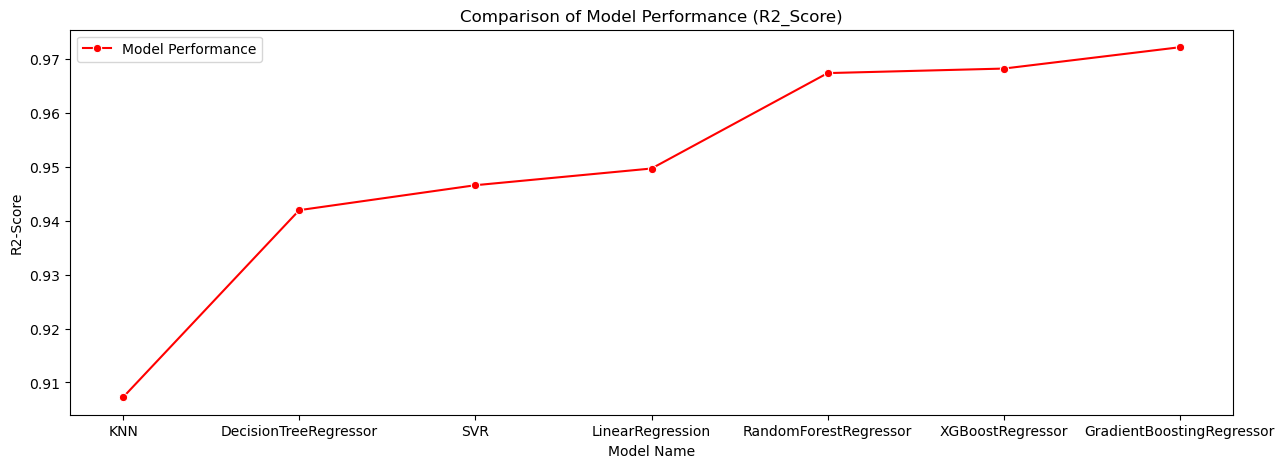

In [193]:
comparison_df = comparison_df.sort_values(by='R2-Score', ascending=True)

max_index = comparison_df['R2-Score'].idxmax() 

plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='R2-Score', marker='o', color='red', label="Model Performance")


plt.xlabel("Model Name")
plt.ylabel("R2-Score")

plt.title("Comparison of Model Performance (R2_Score)")
plt.show()

### 10. Conclusion

Among the different algorithms we used to train our models, the Gradient Boosting model performed the best. The model worked well after being checked for overfitting, keeping the standard deviation within the allowed range (<=0.05).Additionally, we evaluated multiple metrics, and the error also remained within the acceptable range(<10%) indicating good model performance. These results confirms that the GRADIENT BOOSTING model is well-suited for this dataset. 

### 11. Report on challenges faced

1. We were provided with two datasets,and initially, handling them was challenging, especially when extracting features from the hourly dataset.
2. With many attributes in the dataset, understanding and analyzing different domains was quite challenging.
3. And also finding the relations between features and target are challenging.
 

##### Project Details:
Project Team ID:
PTID-CDS-JAN-25-2365

Project ID:
PRCP-1018-BikeRental

Team Members:
1. Akshaya S.K - akshayasnowbha@gmail.com
2. Rajeshwari A - rajeshwariarumugam03@gmail.com
3. Unnamalai Saranya R - saranyaramesh0602@gmail.com
4. Vyshnavi - vyshnavi2752@gmail.com
